## Linear regression models with scikit-learn

In this lecture we are going to learn:

- How to run a scatter plot of two variables to check for correlation.
- How to estimate a linear regression model with the **scikit-learn** package.
- How to forecast based on a linear regression model. 

As usual, the first step is to import the data by using the **pandas** package. The data refers to median house prices in a metropolitan area in the US. In addition to the target variable, median house price for a given are, we also have a set of predictors such as the nitric oxides concentration (parts per 10 million) (**nox**) as a proxy for pollution, number of rooms (**rm**), per capita crime rate (**crim**) and tax rate (**tax**). 

In [41]:
import pandas as pd

df = pd.read_csv('Boston.csv',index_col = 0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


Let have a quick look at the variables in the dataframe

In [35]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

We first need to check how many missing observations, if any, we do have in the dataset. 

In [36]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

## Preliminary analysis

There is no missing observation so we can start to estimate our regression. Suppose we want to forecast house prices based on the number of rooms and the age of the house. We can first have a visual impression of the correlations. Let consider **nox** first. For plotting we introduce a new package that is called **seaborn**. 

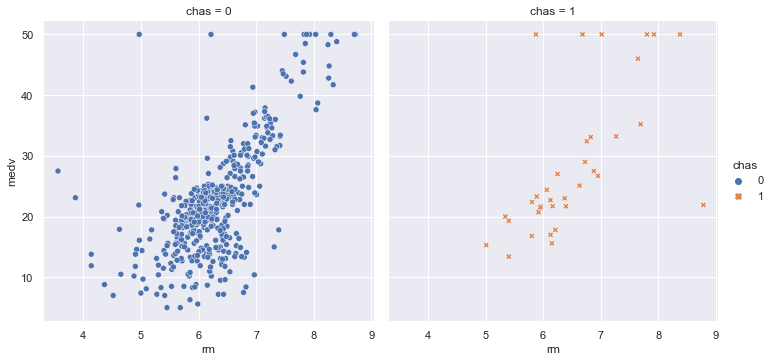

In [45]:
import seaborn as sns
sns.set_theme(style="darkgrid")

sns.relplot(
    data=df, x="rm", y="medv",
    col="chas", hue="chas", style="chas", 
    kind="scatter"
)
#use col='chas' to categorise 'chas' variable 
#hue use different colors for different chas values
#style use different symbols for different chas value

In [42]:
from sklearn.model_selection import train_test_split

# Define the predictor
X       = df[['rm','nox']]

# Define the target variable
y       = df['medv']

# Split the whole data in train vs test data. We take a third of the data as testing sample. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Let us now estimate the linear regression model. Instead of the **statsmodels** package like we did before, we use the **scikit-learn** package which later will be also used to estimate penalised regression methods. 

In [43]:
from sklearn.linear_model import LinearRegression

# Define and estimate the model
model = LinearRegression().fit(X_train, y_train)
coef  = model.coef_

# Display the slope coefficients estimates 
# The coefficients
print('Coefficients: \n', model.coef_)

Coefficients: 
 [  8.12415414 -17.51208276]


There is a positive and significant relationship between **rm** and the median house price. In particular, one room more corresponds to a $8124 higher price, on average, according to the linear regression estimates. 

In addition, there is a negative and significant relationship between **nox** and the median house price. In particular, higher nitric oxides concentration significantly decreases the median house price. 

## Goodness of fit and forecasting 

Similar to the **statsmodels** package, the **sklear** linear model does provide measures of forecasting accuracy. In particular, we can compare the in-sample vs out-of-sample $R^2$. 

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

ypred = model.predict(X_test)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % model.score(X_train, y_train))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, ypred))

Coefficient of determination: 0.52
Coefficient of determination: 0.56


The performance of the linear model is similar both in-sample and out-of-sample. For the testing set the $R^2$ is 56\%. 

We can also consider a whole set of alternative forecasting accuracy measures, such as the Mean Squared Error (MSE)

In [25]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, ypred))

Mean squared error: 33.67


As we know, however, the MSE on itself does not have too much of meaning but it should be used to compare different models. For instance, let's consider a model with more predictors, adding the proportion of non-retail business acres per town (**indus**), and the per capita crime rate per area (**crim**). 

In [47]:
# Define the predictor
X       = df[['rm','nox','indus','crim']]

# Define the target variable
y       = df['medv']

# Split the whole data in train vs test data. We take a third of the data as testing sample. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
# Define and estimate the model
model_2 = LinearRegression().fit(X_train, y_train)
ypred   = model_2.predict(X_test)

# Out of sample R^2
print('R^2: %.2f'
      % r2_score(y_test, ypred))

R^2: 0.59


The $R^2$ increased from 52\% to 59\%, but we should be careful as this marginal increase can just be due to a higher number of predictors. We should consider the **adjusted $R^2$** instead. 